# Predict the Credit_Mix category for a customer based on their financial data, and provide actionable insights to improve credit health.

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/Bank%20Data.csv'
df = pd.read_csv(url)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


# Project Workflow

In order to do this project, must follow this structure....

## 1. Data Preprocessing
- Handle missing and invalid values in the dataset.
- Encode categorical variables appropriately.
- Scale and normalize numeric features for uniformity.
- Detect and address outliers to improve model stability.

In [3]:
# List of columns to drop
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN']

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

# Inspect the remaining columns
print(df.columns)

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  object 
 1   Age                       50000 non-null  object 
 2   Occupation                50000 non-null  object 
 3   Annual_Income             50000 non-null  object 
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               50000 non-null  object 
 9   Type_of_Loan              44296 non-null  object 
 10  Delay_from_due_date       50000 non-null  int64  
 11  Num_of_Delayed_Payment    46502 non-null  object 
 12  Changed_Credit_Limit      50000 non-null  object 
 13  Num_Credit_Inquiries      48965 non-null  float64
 14  Credit

In [5]:
# Inspect unique values in problematic columns
columns_to_inspect = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
                      'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly',
                      'Monthly_Balance']

# Check unique values in each column
for col in columns_to_inspect:
    print(f"Unique values in {col}:")
    print(df[col].unique()[:20])  # Show first 20 unique values
    print()

Unique values in Age:
['23' '24' '24_' '28' '35' '55' '22' '31' '32' '1694' '34' '30' '914' '45'
 '41_' '41' '33' '36' '39' '40']

Unique values in Annual_Income:
['19114.12' '34847.84' '143162.64' '30689.89' '4148862.0' '35547.71'
 '73928.46' '131313.4' '34081.38' '114838.41' '31370.8' '33751.27'
 '88640.24' '54392.16' '8701.545' '25546.26' '31993.78' '92047.08'
 '92047.08_' '32284.62']

Unique values in Num_of_Loan:
['4' '1' '3' '1381' '-100' '0' '2' '7' '5' '6' '5_' '8' '1_' '2_' '6_'
 '4_' '9' '0_' '7_' '965']

Unique values in Num_of_Delayed_Payment:
['7' '9' '4' '5' '1' '3' nan '2_' '1942' '6' '8' '15' '18' '0' '14' '17'
 '12' '11' '2' '19']

Unique values in Changed_Credit_Limit:
['11.27' '13.27' '12.27' '5.42' '7.42' '7.1' '2.1' '1.99' '2.58' '14.14'
 '10.14' '9.34' '10.34' '17.13' '8.24' '_' '-0.2400000000000002' '5.76'
 '11.0' '14.0']

Unique values in Outstanding_Debt:
['809.98' '605.03' '1303.01' '1303.01_' '632.46' '943.86' '548.2' '352.16'
 '1704.18' '1377.74' '421.43' '1

In [6]:
# Define cleaning rules for problematic columns
columns_to_clean = {
    'Age': lambda x: x if 0 < x <= 120 else None,
    'Annual_Income': lambda x: x if x > 0 else None,
    'Num_of_Loan': lambda x: x if 0 <= x <= 50 else None,
    'Num_of_Delayed_Payment': lambda x: x if 0 <= x <= 100 else None,
    'Changed_Credit_Limit': lambda x: x if x >= 0 else None,
    'Outstanding_Debt': lambda x: x if x >= 0 else None,
    'Amount_invested_monthly': lambda x: x if x >= 0 else None,
    'Monthly_Balance': lambda x: x if x >= 0 else None
}

# Remove `_` and clean all columns at once
for col, validation_fn in columns_to_clean.items():
    df[col] = df[col].str.replace('_', '', regex=False)  # Remove underscores
    df[col] = pd.to_numeric(df[col], errors='coerce')    # Convert to numeric
    df[col] = df[col].apply(validation_fn)              # Apply validation rule

# Check the updated dataframe info
print(df.info())

# Check the first few rows of the cleaned columns
print(df[list(columns_to_clean.keys())].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     50000 non-null  object 
 1   Age                       48600 non-null  float64
 2   Occupation                50000 non-null  object 
 3   Annual_Income             50000 non-null  float64
 4   Monthly_Inhand_Salary     42502 non-null  float64
 5   Num_Bank_Accounts         50000 non-null  int64  
 6   Num_Credit_Card           50000 non-null  int64  
 7   Interest_Rate             50000 non-null  int64  
 8   Num_of_Loan               47772 non-null  float64
 9   Type_of_Loan              44296 non-null  object 
 10  Delay_from_due_date       50000 non-null  int64  
 11  Num_of_Delayed_Payment    45825 non-null  float64
 12  Changed_Credit_Limit      48106 non-null  float64
 13  Num_Credit_Inquiries      48965 non-null  float64
 14  Credit

In [7]:
# Summarize missing values
print(df.isnull().sum())

Month                          0
Age                         1400
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                 2228
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      4175
Changed_Credit_Limit        1894
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              568
dtype: int64


In [8]:
# Impute missing values for numerical columns with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Replace missing values with median
for col in numerical_cols:
    if df[col].isnull().sum() > 0:  # Only apply to columns with missing values
        df[col] = df[col].fillna(df[col].median())

# Check for remaining missing values
print(df.isnull().sum())

Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
dtype: int64


In [9]:
# Fill missing values in Type_of_Loan with 'Unknown'
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('Unknown')

# Verify changes
print(df['Type_of_Loan'].isnull().sum())

0


In [10]:
import re

# Function to convert "23 Years and 0 Months" to total months
def convert_to_months(value):
    if pd.isnull(value):  # Handle missing values
        return None
    match = re.match(r'(\d+)\s*Years?\s*and\s*(\d+)\s*Months?', value)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years * 12 + months  # Convert to total months
    return None

# Apply the conversion
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)

# Check the result
print(df['Credit_History_Age'].head())

0    273.0
1    274.0
2      NaN
3    276.0
4    327.0
Name: Credit_History_Age, dtype: float64


In [11]:
# Impute missing values with the median without inplace=True
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].median())

# Verify no missing values remain
print(df['Credit_History_Age'].isnull().sum())

0


In [12]:
# Identify numerical columns (float and int)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:")
print(numerical_columns)

Numerical Columns:
Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')


In [13]:
# Function to detect outliers using IQR
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in each numerical column
for col in numerical_columns:
    outliers = detect_outliers(col)
    print(f"{col}: {len(outliers)} outliers detected")

Age: 3 outliers detected
Annual_Income: 1390 outliers detected
Monthly_Inhand_Salary: 2239 outliers detected
Num_Bank_Accounts: 635 outliers detected
Num_Credit_Card: 1179 outliers detected
Interest_Rate: 966 outliers detected
Num_of_Loan: 4 outliers detected
Delay_from_due_date: 1996 outliers detected
Num_of_Delayed_Payment: 5 outliers detected
Changed_Credit_Limit: 803 outliers detected
Num_Credit_Inquiries: 846 outliers detected
Outstanding_Debt: 2636 outliers detected
Credit_Utilization_Ratio: 0 outliers detected
Credit_History_Age: 0 outliers detected
Total_EMI_per_month: 3933 outliers detected
Amount_invested_monthly: 5401 outliers detected
Monthly_Balance: 3962 outliers detected


In [14]:
# Function to cap outliers using IQR
def cap_outliers(column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: max(min(x, upper_bound), lower_bound))

# Apply to all numerical columns
for col in numerical_columns:
    cap_outliers(col)

# Check the updated data statistics
print(df.describe())

                Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  50000.000000   50000.000000           50000.000000       50000.000000   
mean      33.802670   51257.492065            3942.991306           5.464360   
std       10.621148   38696.367317            2742.343721           2.716667   
min       14.000000    7005.930000             303.645417          -1.000000   
25%       25.000000   19453.327500            1794.304167           3.000000   
50%       33.000000   37577.820000            3086.305000           6.000000   
75%       42.000000   72817.020000            5338.967500           7.000000   
max       67.500000  152862.558750           10655.962500          13.000000   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count     50000.000000   50000.000000  50000.000000         50000.000000   
mean          5.673350      14.984960      3.512060            20.882200   
std           2.239159       9.241775      2.394116

### Encoding the categorical value

In [15]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')


In [16]:
# Apply one-hot encoding
df = pd.get_dummies(df, columns=['Month', 'Occupation', 'Type_of_Loan', 'Payment_Behaviour'], drop_first=True)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Label encode binary/ordinal columns
label_cols = ['Payment_of_Min_Amount']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [18]:
from sklearn.preprocessing import StandardScaler

# Select numerical features (excluding the target feature)
numerical_columns = df.drop('Credit_Mix', axis=1).select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X_scaled = scaler.fit_transform(df[numerical_columns])

# Convert the scaled features back to a DataFrame for inspection (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_columns)

# Update the original dataframe with the scaled features (optional)
df[numerical_columns] = X_scaled_df

# Display the first few rows of the scaled data
print(X_scaled_df.head())

        Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0 -1.017101      -0.830664              -0.772394          -0.907135   
1 -0.922948      -0.830664              -0.772394          -0.907135   
2 -0.922948      -0.830664              -0.772394          -0.907135   
3 -0.922948      -0.830664              -0.312395          -0.907135   
4 -0.546337      -0.424066              -0.330015          -1.275237   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0        -0.747319      -1.296837     0.203810            -1.239072   
1        -0.747319      -1.296837     0.203810            -1.239072   
2        -0.747319      -1.296837     0.203810            -1.516236   
3        -0.747319      -1.296837     0.203810            -1.169782   
4        -0.747319      -0.972221    -1.049275            -1.239072   

   Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0               -1.087279              0.114657              2.7672

## 2. Exploratory Data Analysis (EDA)
- Perform descriptive statistics to understand the data distribution.
- Visualize relationships between features and the target variable.
- Analyze correlations and identify trends or anomalies in the data.

In [19]:
# Display basic info about the dataset
print("Data Overview:")
print(df.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 6303 entries, Age to Payment_Behaviour_Low_spent_Small_value_payments
dtypes: bool(6284), float64(17), int32(1), object(1)
memory usage: 306.7+ MB
None


In [20]:
# Summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  5.000000e+04   5.000000e+04           5.000000e+04       5.000000e+04   
mean   9.521273e-17  -1.736566e-16          -2.447109e-16      -1.847411e-17   
std    1.000010e+00   1.000010e+00           1.000010e+00       1.000010e+00   
min   -1.864475e+00  -1.143570e+00          -1.327107e+00      -2.379543e+00   
25%   -8.287953e-01  -8.218984e-01          -7.835300e-01      -9.071355e-01   
50%   -7.557356e-02  -3.535166e-01          -3.123951e-01       1.971701e-01   
75%    7.718009e-01   5.571516e-01           5.090500e-01       5.652719e-01   
max    3.172695e+00   2.625727e+00           2.447920e+00       2.773883e+00   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count     5.000000e+04   5.000000e+04  5.000000e+04         5.000000e+04   
mean     -4.618528e-17   7.304379e-17 -1.691092e-17        -6.551204e-17   
std       1.000010e+00   1.000

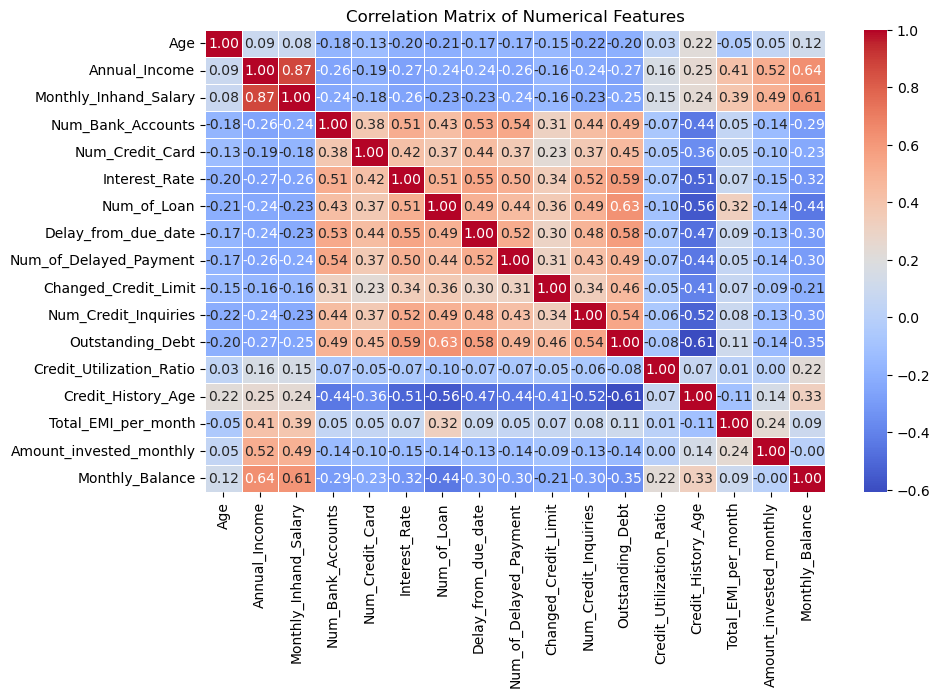

In [21]:
import matplotlib.pyplot as plt  # Ensure you have this import statement

# Compute the correlation matrix for numerical features
correlation_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

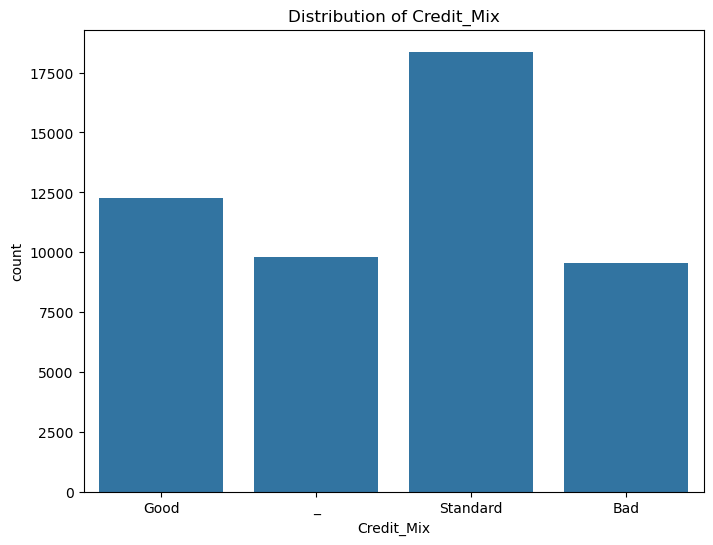

In [22]:
# Plot the distribution of the target feature 'Credit_Mix'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Credit_Mix')
plt.title('Distribution of Credit_Mix')
plt.show()

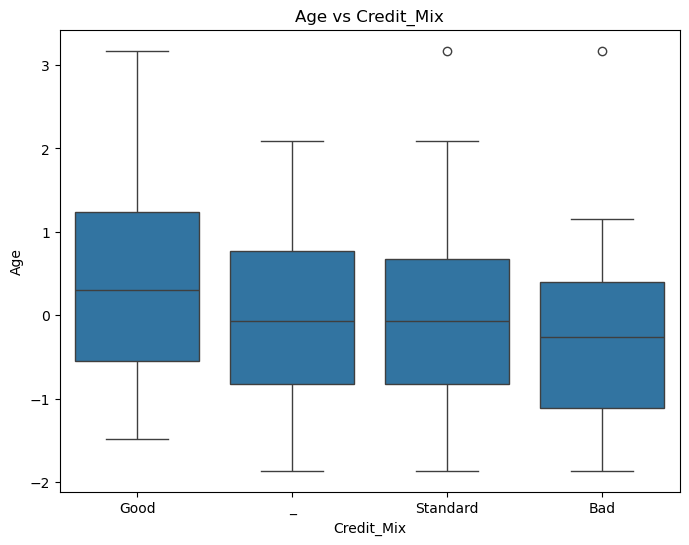

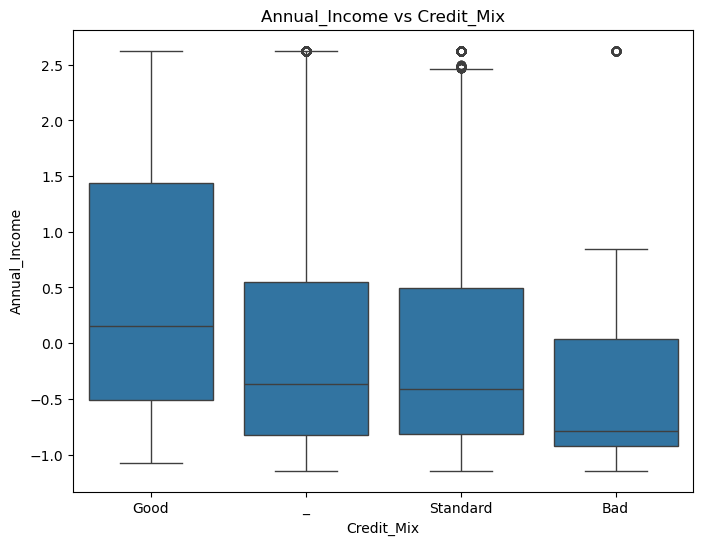

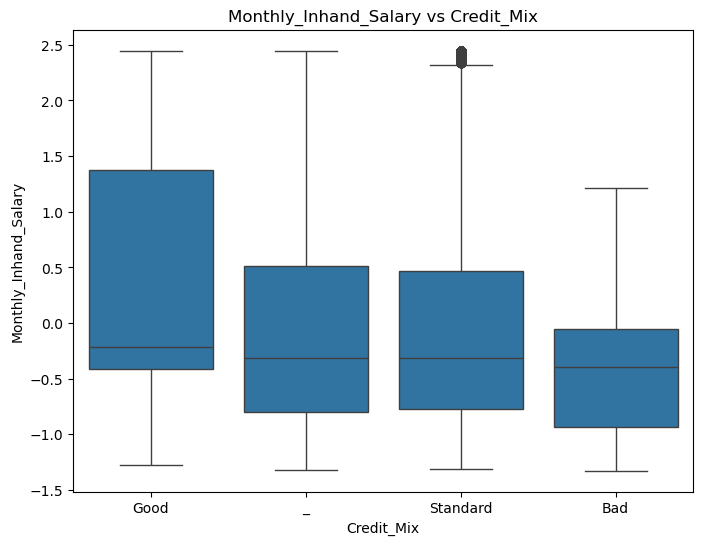

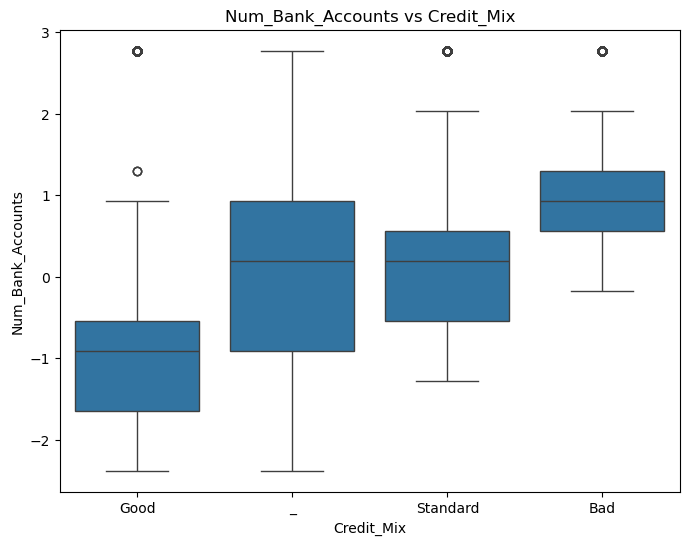

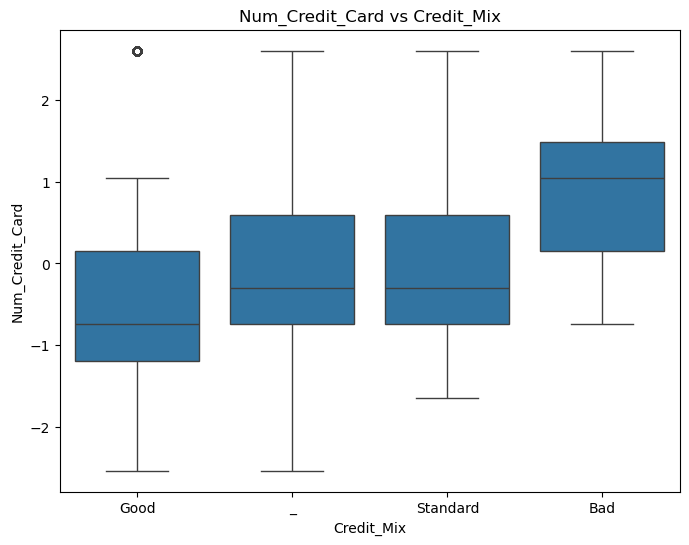

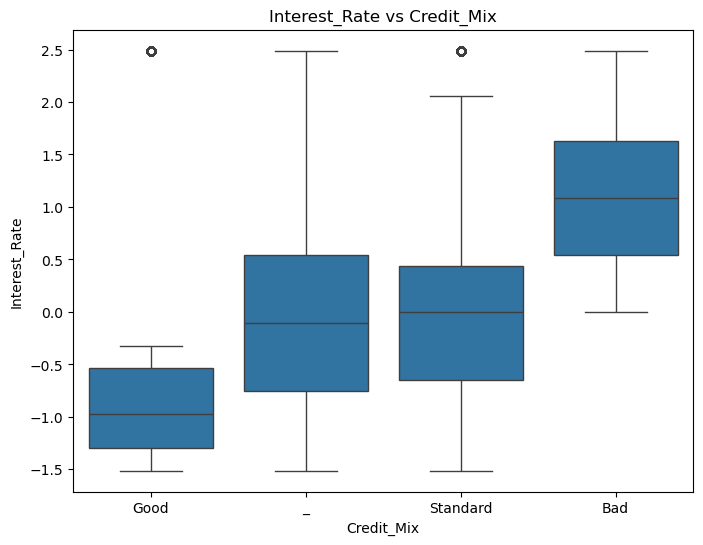

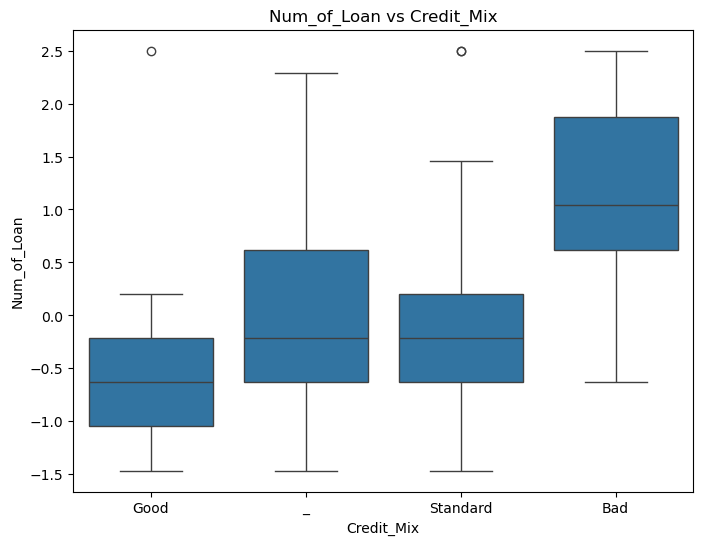

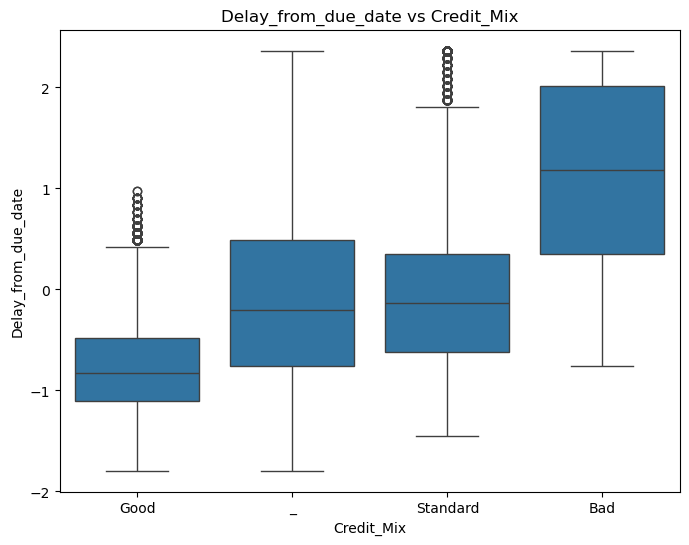

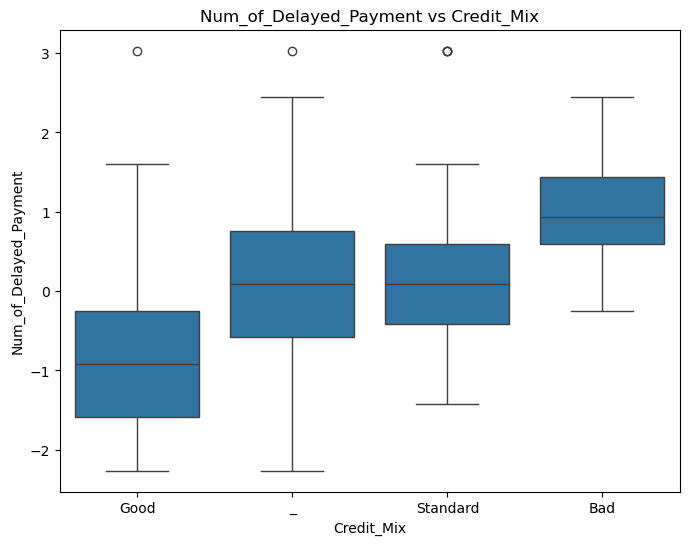

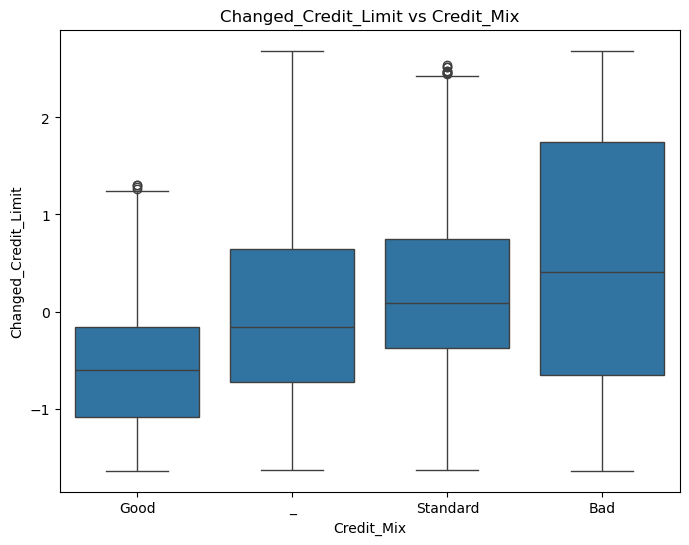

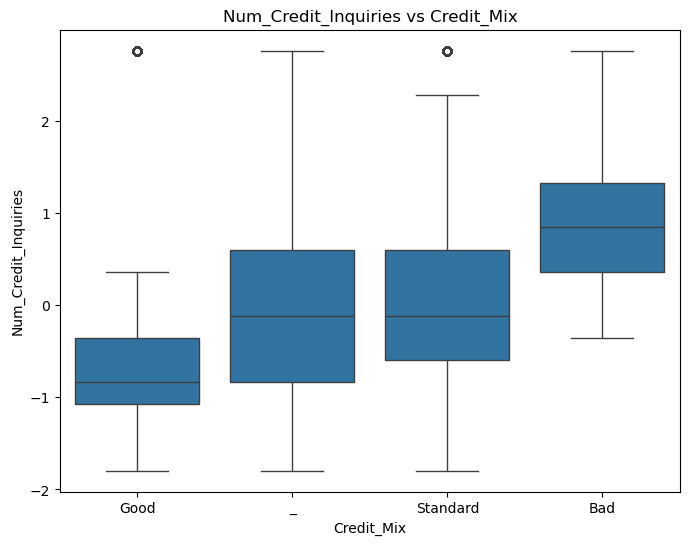

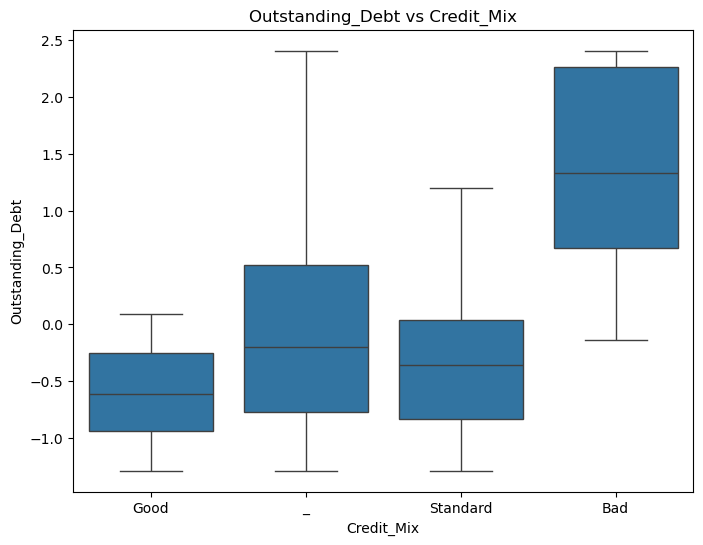

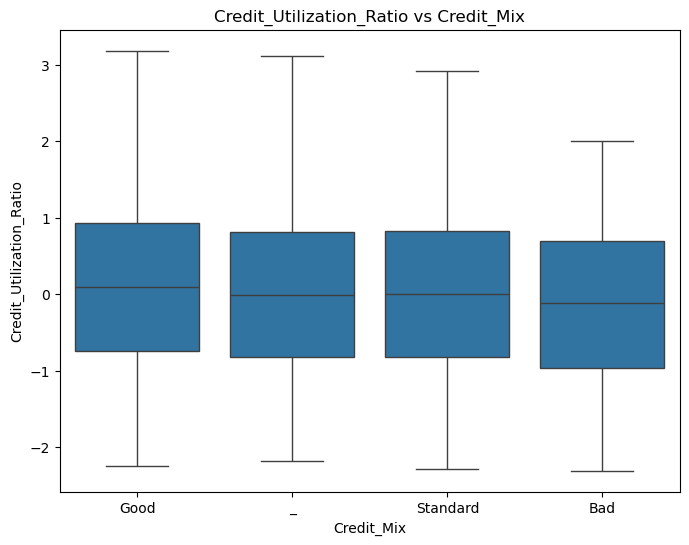

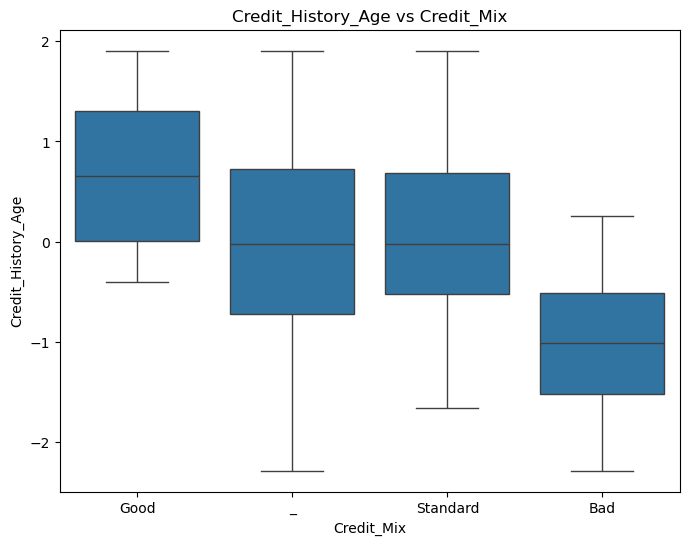

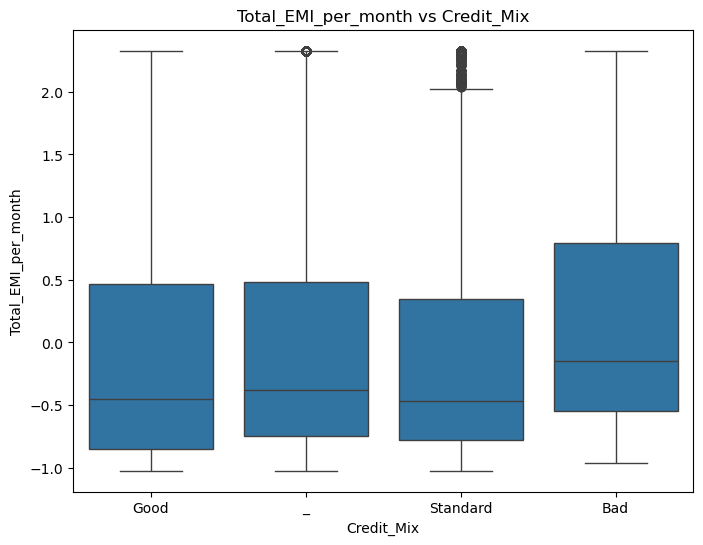

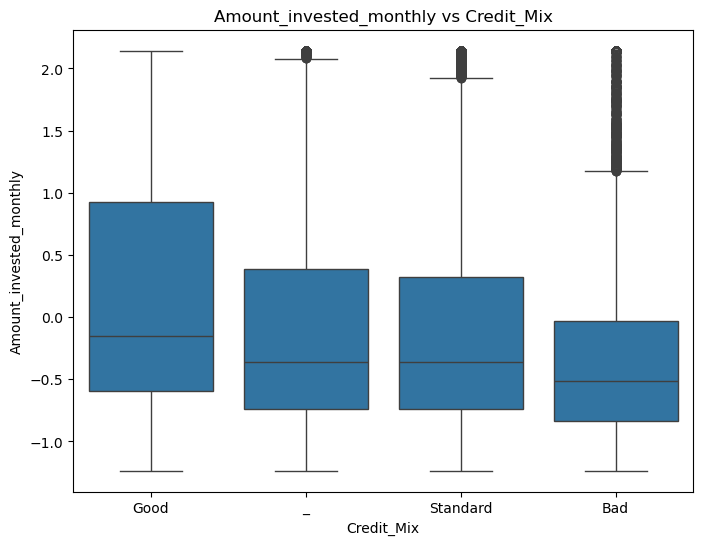

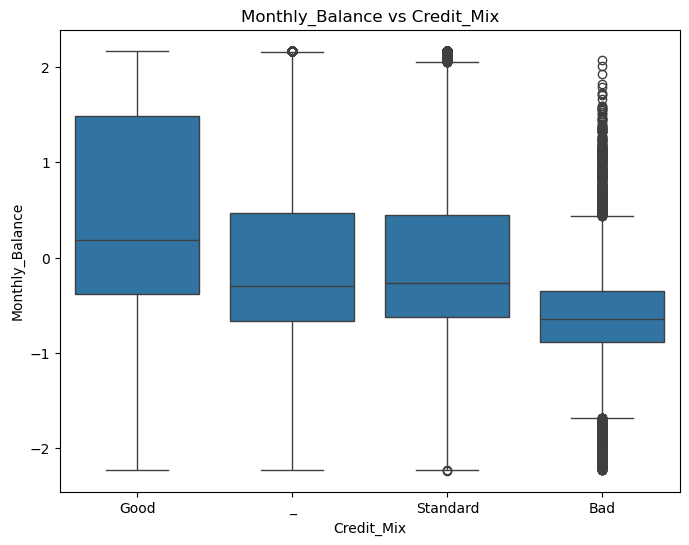

In [23]:
# Box plots for numerical features vs target 'Credit_Mix'
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Credit_Mix', y=col)
    plt.title(f'{col} vs Credit_Mix')
    plt.show()

## 3. Model Building
- Train multiple machine learning models using the preprocessed data.
- Evaluate the suitability of various models for the task.


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# X_scaled_df is the scaled features DataFrame
X = X_scaled_df  # Use the scaled features (X_scaled_df)
y = df['Credit_Mix']  # Target feature

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7595

Classification Report:
               precision    recall  f1-score   support

         Bad       0.79      0.95      0.86      1920
        Good       0.78      0.93      0.85      2458
    Standard       0.77      0.94      0.84      3655
           _       0.18      0.03      0.05      1967

    accuracy                           0.76     10000
   macro avg       0.63      0.71      0.65     10000
weighted avg       0.66      0.76      0.69     10000


Confusion Matrix:
 [[1829    0   39   52]
 [   0 2296  102   60]
 [  41   71 3419  124]
 [ 440  579  897   51]]


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Logistic Regression model
lr_clf = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
lr_clf.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_clf.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.6973

Classification Report:
               precision    recall  f1-score   support

         Bad       0.76      0.89      0.82      1920
        Good       0.74      0.84      0.79      2458
    Standard       0.69      0.85      0.76      3655
           _       0.22      0.05      0.08      1967

    accuracy                           0.70     10000
   macro avg       0.60      0.66      0.61     10000
weighted avg       0.62      0.70      0.64     10000


Confusion Matrix:
 [[1702    0  173   45]
 [   0 2075  351   32]
 [ 120  188 3103  244]
 [ 417  560  897   93]]


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_clf.predict(X_test)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.749

Classification Report:
               precision    recall  f1-score   support

         Bad       0.77      0.95      0.85      1920
        Good       0.76      0.91      0.83      2458
    Standard       0.73      0.94      0.82      3655
           _       0.17      0.00      0.00      1967

    accuracy                           0.75     10000
   macro avg       0.61      0.70      0.63     10000
weighted avg       0.64      0.75      0.67     10000


Confusion Matrix:
 [[1826    0   90    4]
 [   0 2241  212    5]
 [  98  128 3419   10]
 [ 445  576  942    4]]


In [27]:
from sklearn.svm import SVC

# Initialize the SVM model with class weights set to 'balanced'
svm_clf = SVC(random_state=42, class_weight='balanced')

# Train the model
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("Support Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine Accuracy: 0.732

Classification Report:
               precision    recall  f1-score   support

         Bad       0.75      0.97      0.85      1920
        Good       0.71      0.92      0.80      2458
    Standard       0.74      0.87      0.80      3655
           _       0.08      0.00      0.00      1967

    accuracy                           0.73     10000
   macro avg       0.57      0.69      0.61     10000
weighted avg       0.60      0.73      0.65     10000


Confusion Matrix:
 [[1871    0   49    0]
 [   0 2257  197    4]
 [ 155  301 3191    8]
 [ 475  629  862    1]]


In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model (you can adjust n_neighbors if needed)
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of n_neighbors

# Train the model
knn_clf.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 0.6917

Classification Report:
               precision    recall  f1-score   support

         Bad       0.75      0.90      0.82      1920
        Good       0.69      0.86      0.77      2458
    Standard       0.72      0.82      0.77      3655
           _       0.19      0.05      0.08      1967

    accuracy                           0.69     10000
   macro avg       0.59      0.66      0.61     10000
weighted avg       0.62      0.69      0.64     10000


Confusion Matrix:
 [[1719    0   83  118]
 [   0 2110  217  131]
 [ 129  339 2983  204]
 [ 442  587  833  105]]


## 4. Model Evaluation
- Compute and plot evaluation metrics for all models, such as accuracy, precision, recall, F1-score, and AUC-ROC.
- Compare the performance of models across multiple metrics.


                    Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0           Random Forest    0.7595   0.628986  0.712014  0.650679  0.837726
1     Logistic Regression    0.6973   0.601432  0.656724  0.610298  0.820393
2     K-Nearest Neighbors    0.6917   0.589638  0.655814  0.608908  0.822765
3  Support Vector Machine    0.7320   0.568870  0.691566  0.612359  0.000000
4       Gradient Boosting    0.7490   0.609718  0.700056  0.626778  0.834031


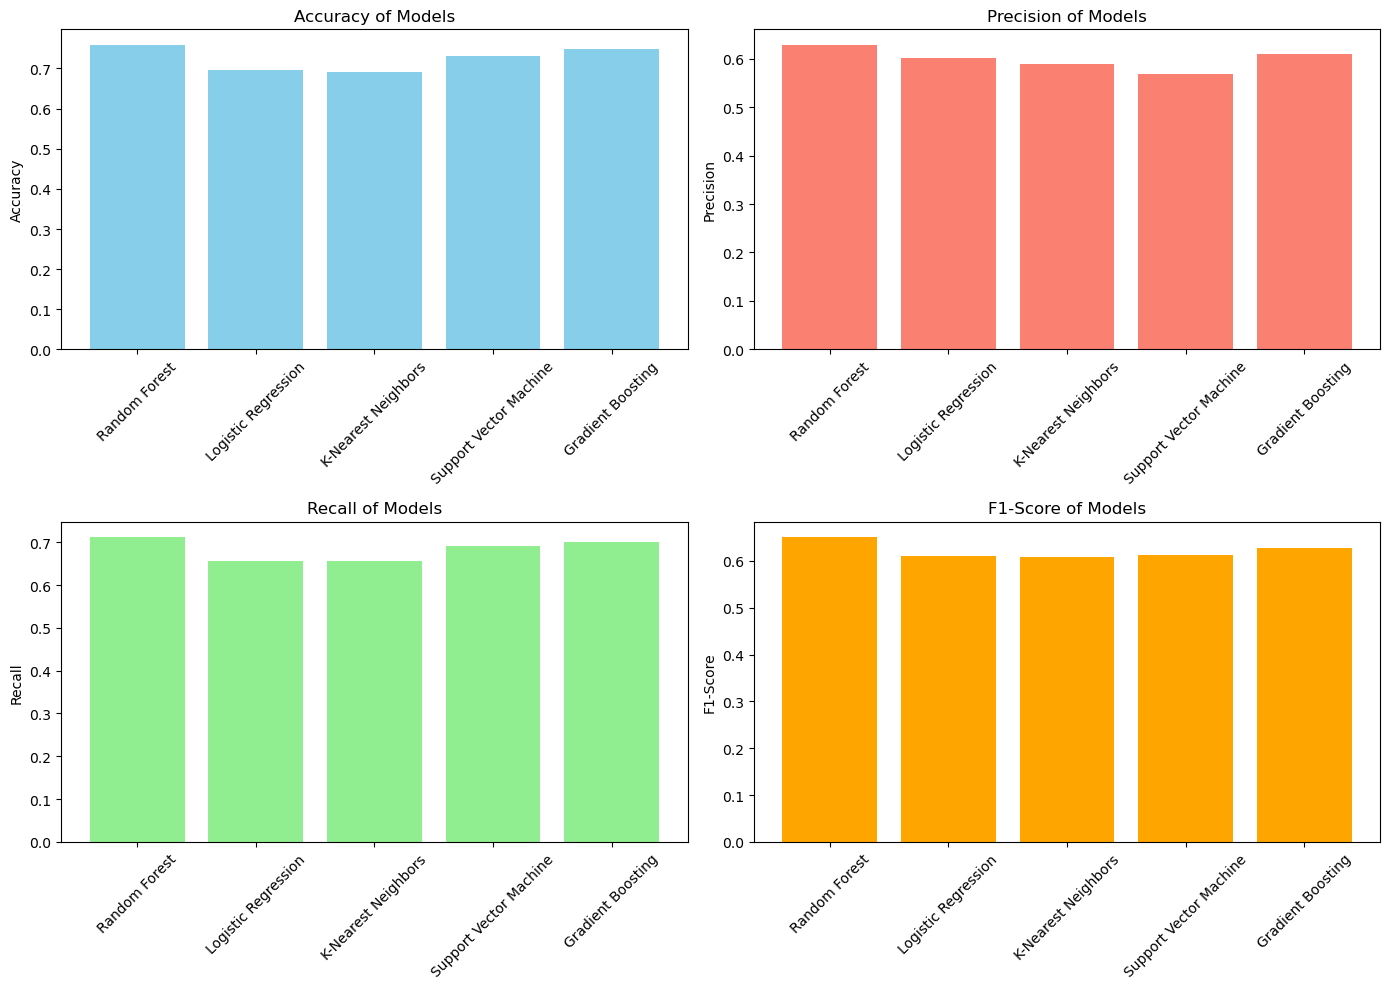

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Assuming models have been trained, and you have results for each model like accuracy, precision, etc.

# Store evaluation metrics for each model
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
roc_auc_list = []

# Assuming models, X_test, and y_test are already defined and models have been trained
models = {
    "Random Forest": rf_clf,
    "Logistic Regression": lr_clf,
    "K-Nearest Neighbors": knn_clf,
    "Support Vector Machine": svm_clf,
    "Gradient Boosting": gb_clf
}

# Evaluate each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Get classification report (average metrics)
    class_report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    
    # Extract and store the metrics
    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(class_report['macro avg']['precision'])
    recall_list.append(class_report['macro avg']['recall'])
    f1_score_list.append(class_report['macro avg']['f1-score'])
    
    try:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr', average='macro')
    except:
        roc_auc = 0  # In case ROC-AUC cannot be computed
    roc_auc_list.append(roc_auc)

# Create a DataFrame to store all the metrics for comparison
metrics_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1_score_list,
    'AUC-ROC': roc_auc_list
})

# Print the metrics dataframe
print(metrics_df)

# Now you can plot the evaluation metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy Plot
axes[0, 0].bar(metrics_df['Model'], metrics_df['Accuracy'], color='skyblue')
axes[0, 0].set_title('Accuracy of Models')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_xticks(range(len(metrics_df['Model'])))  # Set the ticks
axes[0, 0].set_xticklabels(metrics_df['Model'], rotation=45)

# Precision Plot
axes[0, 1].bar(metrics_df['Model'], metrics_df['Precision'], color='salmon')
axes[0, 1].set_title('Precision of Models')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_xticks(range(len(metrics_df['Model'])))  # Set the ticks
axes[0, 1].set_xticklabels(metrics_df['Model'], rotation=45)

# Recall Plot
axes[1, 0].bar(metrics_df['Model'], metrics_df['Recall'], color='lightgreen')
axes[1, 0].set_title('Recall of Models')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_xticks(range(len(metrics_df['Model'])))  # Set the ticks
axes[1, 0].set_xticklabels(metrics_df['Model'], rotation=45)

# F1-Score Plot
axes[1, 1].bar(metrics_df['Model'], metrics_df['F1-Score'], color='orange')
axes[1, 1].set_title('F1-Score of Models')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].set_xticks(range(len(metrics_df['Model'])))  # Set the ticks
axes[1, 1].set_xticklabels(metrics_df['Model'], rotation=45)

plt.tight_layout()
plt.show()


## 5. Hyperparameter Tuning
- Optimize hyperparameters for each model using systematic search methods.
- Identify the best configuration for improved performance.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters for Random Forest:", grid_search.best_params_)

# Get the best model (with the optimal hyperparameters)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],  # 'l1' is available with 'liblinear' solver
    'solver': ['liblinear', 'lbfgs']
}

# Initialize the Logistic Regression model
lr_clf = LogisticRegression(max_iter=1000, random_state=42)

# Perform Grid Search with Cross-Validation
lr_grid_search = GridSearchCV(estimator=lr_clf, param_grid=lr_param_grid, cv=5, n_jobs=-1, verbose=2)
lr_grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for Logistic Regression:", lr_grid_search.best_params_)
print("Best Accuracy for Logistic Regression:", lr_grid_search.best_score_)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN model
knn_clf = KNeighborsClassifier()

# Perform Grid Search with Cross-Validation
knn_grid_search = GridSearchCV(estimator=knn_clf, param_grid=knn_param_grid, cv=5, n_jobs=-1, verbose=2)
knn_grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for KNN:", knn_grid_search.best_params_)
print("Best Accuracy for KNN:", knn_grid_search.best_score_)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

# Initialize the Gradient Boosting model
gb_clf = GradientBoostingClassifier(random_state=42)

# Perform Randomized Search with Cross-Validation
gb_random_search = RandomizedSearchCV(estimator=gb_clf, param_distributions=gb_param_grid, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
gb_random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters for Gradient Boosting:", gb_random_search.best_params_)
print("Best Accuracy for Gradient Boosting:", gb_random_search.best_score_)

## 6. Retrain Models
- Retrain all models using the optimal hyperparameters on the training data.
- Validate the models on unseen data to ensure robustness.

In [ ]:
# Retrain Random Forest with the best hyperparameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Validate the Random Forest on unseen data
y_pred_rf_best = best_rf.predict(X_test)
print("Random Forest - Test Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print("\nRandom Forest - Classification Report:\n", classification_report(y_test, y_pred_rf_best))
print("\nRandom Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))

# Retrain Logistic Regression with the best hyperparameters
best_lr = lr_grid_search.best_estimator_
best_lr.fit(X_train, y_train)

# Validate Logistic Regression on unseen data
y_pred_lr_best = best_lr.predict(X_test)
print("Logistic Regression - Test Accuracy:", accuracy_score(y_test, y_pred_lr_best))
print("\nLogistic Regression - Classification Report:\n", classification_report(y_test, y_pred_lr_best))
print("\nLogistic Regression - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_best))

# Retrain KNN with the best hyperparameters
best_knn = knn_grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Validate KNN on unseen data
y_pred_knn_best = best_knn.predict(X_test)
print("K-Nearest Neighbors - Test Accuracy:", accuracy_score(y_test, y_pred_knn_best))
print("\nK-Nearest Neighbors - Classification Report:\n", classification_report(y_test, y_pred_knn_best))
print("\nK-Nearest Neighbors - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_best))

# Retrain Gradient Boosting with the best hyperparameters
best_gb = gb_random_search.best_estimator_
best_gb.fit(X_train, y_train)

# Validate Gradient Boosting on unseen data
y_pred_gb_best = best_gb.predict(X_test)
print("Gradient Boosting - Test Accuracy:", accuracy_score(y_test, y_pred_gb_best))
print("\nGradient Boosting - Classification Report:\n", classification_report(y_test, y_pred_gb_best))
print("\nGradient Boosting - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb_best))


## 7. Final Performance and Cross-Validation
- Evaluate the final performance of each model using cross-validation scores.
- Compare results to select the best-performing model.


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Use the models after grid/randomized search or default
best_rf_clf = grid_search.best_estimator_  # Best Random Forest model from grid search
best_lr_clf = lr_grid_search.best_estimator_  # Best Logistic Regression model from grid search
best_knn_clf = knn_grid_search.best_estimator_  # Best KNN model from grid search
best_svm_clf = svm_clf  # Default SVM model (no hyperparameter tuning)
best_gb_clf = gb_random_search.best_estimator_  # Best Gradient Boosting model from randomized search

# Define models with the best hyperparameters or default models
models = {
    "Random Forest": best_rf_clf,
    "Logistic Regression": best_lr_clf,
    "K-Nearest Neighbors": best_knn_clf,
    "Support Vector Machine": best_svm_clf,
    "Gradient Boosting": best_gb_clf
}

# Store the results of cross-validation
cv_results = {
    "Model": [],
    "Mean Accuracy": [],
    "Std Accuracy": []
}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Cross-validation scores for the current model
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy')
    
    # Store results
    cv_results["Model"].append(model_name)
    cv_results["Mean Accuracy"].append(np.mean(cv_scores))
    cv_results["Std Accuracy"].append(np.std(cv_scores))

# Create a DataFrame to store the results for comparison
cv_results_df = pd.DataFrame(cv_results)

# Display the results
print(cv_results_df)


## 8. Suggestions
- Provide recommendations based on the model insights and analysis.
- Suggest actionable steps to improve outcomes or address any gaps identified during the project.


### 1. Random Forest - Best Model
**Action**: Could be Deployed as the primary model due to high accuracy and robustness. Further tune hyperparameters (e.g., max_depth, n_estimators) for potential improvements.

### 2. Gradient Boosting
**Action**: Can be Used as a secondary model, fine-tuning parameters (e.g., learning_rate, n_estimators) to improve performance. Consider ensembling with Random Forest for better accuracy.

### 3. K-Nearest Neighbors (KNN)
**Action**: Need to do experiment with n_neighbors and distance metrics (e.g., manhattan, cosine) to improve accuracy.

### 4. Logistic Regression
**Action**: Not ideal for this dataset, but can be improved with interaction terms or stronger regularization.

### Key Areas to Improve
1. **Class Imbalance**: 
   - **Action**: Could be use SMOTE or class weighting to handle underrepresented classes.
   
2. **Model Interpretability**: 
   - **Action**: Could be use SHAP or LIME for better insights into feature importance and decision-making.
   
3. **Model Drift**: 
   - **Action**: Need to Set up periodic evaluations and retraining to handle changes in data distribution.
   
4. **Efficiency**: 
   - **Action**: Need to Consider computational efficiency when choosing models for production.
   
5. **Outlier Handling**: 
   - **Action**: Need to Detect and remove outliers using methods like Z-score or IQR for improved performance.

### 1. Random Forest - Best Model
**Action**: Could be Deployed as the primary model due to high accuracy and robustness. Further tune hyperparameters (e.g., max_depth, n_estimators) for potential improvements.

### 2. Gradient Boosting
**Action**: Can be Used as a secondary model, fine-tuning parameters (e.g., learning_rate, n_estimators) to improve performance. Consider ensembling with Random Forest for better accuracy.

### 3. K-Nearest Neighbors (KNN)
**Action**: Need to do experiment with n_neighbors and distance metrics (e.g., manhattan, cosine) to improve accuracy.

### 4. Logistic Regression
**Action**: Not ideal for this dataset, but can be improved with interaction terms or stronger regularization.

### Key Areas to Improve
1. **Class Imbalance**: 
   - **Action**: Could be use SMOTE or class weighting to handle underrepresented classes.
   
2. **Model Interpretability**: 
   - **Action**: Could be use SHAP or LIME for better insights into feature importance and decision-making.
   
3. **Model Drift**: 
   - **Action**: Need to Set up periodic evaluations and retraining to handle changes in data distribution.
   
4. **Efficiency**: 
   - **Action**: Need to Consider computational efficiency when choosing models for production.
   
5. **Outlier Handling**: 
   - **Action**: Need to Detect and remove outliers using methods like Z-score or IQR for improved performance.